# ADA 2018 -  Music Evolution: 2000's forward

#### Andres Montero, Ariel Alba, Diego Iriarte




## Abstract

Music is a crucial element of everyday life and human culture. People spend several hours listening to it
and lots of money acquiring it. “… Whenever humans come together for any reason, music is there,” writes Daniel
Levitin “….weddings, funerals, graduation from college, men marching off to war, stadium sporting events, a
night on the town, prayer, a romantic dinner, mothers rocking their infants to sleep and college students
studying with music as a background….”
History tells that very early man developed primitive flutes from animal bones and used stones and wood as
percussion, producing the first types of music. Voice would have been the first and most natural means of
expression in our distant ancestors, used to bond socially or comfort a sleepless child. It is from these
humble
beginnings that the music we enjoy today evolved.

Have you ever wondered how music evolved in the last years? Today with the explosion of the internet, music Services as Apple Music, Spotify, Tidal and other apps and platforms; it has become easier to access, obtain and share music. This project aims to find the evolution of music since 2000's in terms of songs/genres/artists popularity and preferences, evaluate the key features of the songs, such as energy, valence and danceability. We aim to understand and show how and which was the most popular genre in the last years, the most popular songs, the most important artist and what were the trends of the key features of those hits. 

For this purpose, we'll work with two datasets:

* FMA: A Dataset For Music Analysis
* Our crawled dataset created using Spotify and LastFM API



In [1]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import reverse_geocoder as rg
import os.path
import ast
import seaborn as sns
import os
import sys
import matplotlib
import urllib, base64
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode,iplot
init_notebook_mode(connected=True)



from sklearn.manifold import TSNE   
from sklearn.cluster import KMeans  
from helpers import *
from datetime import datetime, date, time
from scipy import stats

try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

%load_ext autoreload
%autoreload 2


# Notebook Overview

## 1. Dataset Description
*  1.1 [FMA Dataset](#1.1)
*  1.2 [LastFM and Spotify API](#1.2)


## 2. Pre-processing and Dataframes Creation

*  2.1 [FMA Dataset](#2.1)
*  2.2 [Spotify Dataset](#2.2)

## 3. Data Analysis
*   3.1 [Albums Date Released](#3.1)
*   3.2 [Tracks Date Released](#3.2)
*   3.3 [Where are the tracks produced?](#3.3)
*   3.4 [Top 10 Albums](#3.4)
*   3.5 [Top 10 Tracks](#3.5)
*   3.6 [Clustering using Key-Features](#3.6)
*   3.7 [Correlation Analysis](#3.7)
*  3.7.1 [Relation between danceability and duration of the song](#3.7.1)
*  3.7.2 [Relation between Valence-Danceability](#3.7.2)
*  3.7.3 [Relation between Valence-Energy](#3.7.3)
*  3.8 [Top tracks/genres by key features](#3.8)
*  3.8.1 [Valence per Genre](#3.8.1)
*  3.8.2 [Genres by # of tracks](#3.8.2)
*  3.8.3 [Genres by popularity](#3.8.3)
*  3.8.4 [Top artists since 2000s](#3.8.4)

## 4 Evolution of music Valence/Energy/Danceability
*  4.1 [Valence 2000-2018](#4.1)
*  4.2 [Danceability 2000-2018](#4.2)
*  4.3 [Energy 2000-2018](#4.3)
*  4.4 [Valence 2000-2010](#4.4)
*  4.5 [Danceability 2000-2010](#4.5)
*  4.6 [Energy 2000-2010](#4.6)
*  4.7 [Valence 2010-2018](#4.7)
*  4.8 [Danceability 2010-2018](#4.8)
*  4.9 [Energy 22010-2018](#4.9)

## 1. Dataset Description
<a id='1.1'></a>
### 1.1 FMA Dataset.
Free Music Archive (FMA), is an open and easily accessible music dataset. The dataset contains the information of 106,574 tracks from 16,341 artists and 14,854 albums, arranged in a hierarchical taxonomy of 161 genres. It provides full-length and high-quality audio, pre-computed features, together with track- and user-level metadata, tags, and free-form text such as biographies. For the project purposes, we focused on user-level metadata obtained in the following files:

* tracks.csv: Per track metadata such as ID, title, artist, genres, tags and play counts, for all 106,574 tracks.
* genres.csv: All 161 genre IDs with their name and parent (used to infer the genre hierarchy and top-level genres).
* features.csv: track features extracted with librosa
* echonest.csv: Audio features provided by Echonest (now Spotify) for a subset of 13,129 tracks.

From the previous list of files, we only considered tracks.csv, genres.csv, and echonest.csv, since features.csv contains musical attributes of the tracks and such information and its analysis is not included on the scope of the project.


Then, we analyzed the features contained in each of the three mentioned CSV files and extracted the ones that seemed to be useful for our analysis purposes and aligned with the objectives of the project.

The features extracted are:

#### From tracks.csv:
* Track_id: track identification number for the platform used.
* Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is the least danceable and 1.0 is most danceable.
* Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* Artist_latitude: latitude location of the artist who performed the track
* Artist_longitude: longitude location of the artist who performed the track.
* Artist_name: name of the artist who performed the track.
* artist_discovery
* Artist_hotness: Artist popularity is derived mathematically from track popularity.
* song_currency
* Song_hotness:  The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity is calculated by the algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past

#### From genres.csv:
* genre_id: 
* #tracks: 
* parent
* top_level

#### From echonest.csv:
* Track_id
* Album_date_created
* Album_date_released
* Album_id
* Album_listens
* album_title
* Artist_id
* artist_latitude
* Artist_longitude
* artist_name    
* Track_duration
* Track_genre_top
* Track_genres_all
* Track_language
* Track_listens
* Track_tags
* track_title



<a id='1.2'></a>
### 1.2 Spotify and LastFM API
To complete the information gathered from FMA dataset, we used Spotify and LastFM API for years 2015-2018. The purpose was to complete the dataset with updated information about the last years, so our analysis could include the music evolution until 2018. 

Spotify tracks’ metadata contain a lot of information, and as before, we extracted only the ones that were considered useful for our study purposes, we were able to complete tracks information for the last years with the same features that we had with FMA dataset. We were able to gather a huge amount of information from Spotify, so we decided to just work with a sample of it, so our analysis could be balanced over the years. 

We merged both datasets into a one complete dataset containing information for all the years, we cleaned the data. 

In [2]:
import plotly.tools as tls

tls.embed("https://plot.ly/~Diegogab/70/top-10-albums/")
tls.embed("https://plot.ly/~Diegogab/74/top-10-tracks/")

In [2]:
# Constants
DATA_DIR = '../data/'

MUSIC_DIR = '{dir}{file}/'.format(dir=DATA_DIR, 
                                  file='fma_metadata')
CSV_DIR = 'assets/csv/'

PKL_DIR = '{dir}{file}/'.format(dir=DATA_DIR, 
                               file='pkl')
DEBUG = True

FEATURES = ['danceability', 'energy', 'valence', 'song_hotness']


<a id='2.1'></a>

## 2. Pre-processing and Dataframes Creation

#### 2.1 FMA Dataset
By looking at the FMA dataset we find out that metadata CSV file is full of unnecessary information for our analysis.
Thus, we define which variables, type of variables and name of columns we are going to extract from the FMA CSV files.
Then we proceed with the cleaning of the data so that we can have the information in a more suitable representation for further analysis.

We realize that the tracks dataframe contains also information about artists and albums and echonest has information for each track, thus, to have a better organization and not have redundancy, we joined tracks and echonest. Then the joined table was split into 3 new dataframes: tracks, albums, and artists.

Finally, we have 4 main __datasets: genres, artists, albums and tracks__.

FMA dataset (https://lts2.epfl.ch/datasets/fma/) was gathered by joining a lot of information of many music API services like Echonest(now Spotify), LastFM, MusicBrainz, and others more, thus, there are some columns that have data redundancy.





<a id='2.2'></a>
#### 2.2 Spotify 

# TODO PENDING EXPLANATION OF SPOTIFY


After all the data cleaning preprocessing we can load the pickle files and start with the data Analysis, for further information about the cleaning steps and pre_processing you can go to the notebook : data_cleaning

In [3]:
# Read  and write files depending on the existance of own path
genres_df_path = '{dir}{file}'.format(dir=PKL_DIR, 
                                     file='genres_df.pkl')
albums_df_path = '{dir}{file}'.format(dir=PKL_DIR, 
                                     file='albums_df.pkl')
artists_df_path = '{dir}{file}'.format(dir=PKL_DIR, 
                                     file='artists_df.pkl')
tracks_df_path = '{dir}{file}'.format(dir=PKL_DIR, 
                                      file='tracks_df.pkl')
track_genre_rel_df_path = '{dir}{file}'.format(dir=PKL_DIR, 
                                               file='track_genre_rel_df.pkl')
if os.path.exists(genres_df_path):
    genres_df = pd.read_pickle(genres_df_path)
else:
    print('There is no genres pandas data')
    
if os.path.exists(albums_df_path):
    albums_df = pd.read_pickle(albums_df_path)
else:
    print('There is no albums pandas data')
    
if os.path.exists(artists_df_path):
    artists_df = pd.read_pickle(artists_df_path)
else:
    print('There is no artists pandas data')
    
if os.path.exists(tracks_df_path):
    tracks_df = pd.read_pickle(tracks_df_path)
else:
    print('There is no tracks pandas data')
    
if os.path.exists(track_genre_rel_df_path):
    track_genre_rel_df = pd.read_pickle(track_genre_rel_df_path)
else:
    print('There is no tracks-genres pandas data')
    

Now we will observe the details of each df

In [4]:
pretty_print(genres_df, 'Genres', True)
pretty_print(artists_df, 'Artists', True)
pretty_print(albums_df, 'Albums', True)
pretty_print(tracks_df, 'Tracks', True)
pretty_print(track_genre_rel_df, 'Track-Genre', True)


Genres size: 163

NaN count by column:
genre_id        0
#tracks         0
parent          0
title           0
top_level       0
genre_parent    0
dtype: int64


,genre_id,#tracks,parent,title,top_level,genre_parent
0,1,8693,38,Avant-Garde,38,Experimental
1,2,5271,0,International,2,International
2,3,1752,0,Blues,3,Blues
3,4,4126,0,Jazz,4,Jazz
4,5,4106,0,Classical,5,Classical


Artists size: 21966

NaN count by column:
artist_id               0
artist_discovery    19090
city                18130
state               18130
country             18130
artist_family       19090
artist_hotness      13465
artist_latitude     18130
artist_longitude    18130
artist_name             0
dtype: int64


,artist_id,artist_discovery,city,state,country,artist_family,artist_hotness,artist_latitude,artist_longitude,artist_name
0,1,0.388990,Lakehurst,New Jersey,US,0.38674,0.40637,40.0583,-74.4057,AWOL
1,6,0.557339,NaN,NaN,NaN,0.614272,0.798387,NaN,NaN,Kurt Vile
2,54,0.388923,Providence,Rhode Island,US,0.330784,0.4063,41.824,-71.4128,Alec K. Redfearn & the Eyesores
3,56,0.252381,Providence,Rhode Island,US,0.238153,0.263657,41.824,-71.4128,Amoebic Ensemble
4,60,0.262717,Philadelphia,Pennsylvania,US,0.173315,0.274455,39.9523,-75.1638,Arc and Sender


Albums size: 19621

NaN count by column:
album_id                  0
album_date_created     5226
album_date_released    5404
album_title               1
album_listens            34
dtype: int64


,album_id,album_date_created,album_date_released,album_title,album_listens
0,1,2008-11-26 01:44:45,2009-01-05,AWOL - A Way Of Life,6073.0
1,6,2008-11-26 01:45:08,2008-02-06,Constant Hitmaker,47632.0
2,60,2008-11-26 01:49:57,2009-01-16,Every Man For Himself,1304.0
3,61,2008-11-26 01:49:59,2007-05-22,The Blind Spot,1300.0
4,62,2008-11-26 01:50:03,2005-01-25,The Quiet Room,845.0


Tracks size: 285078

NaN count by column:
track_id               0
track_title            1
track_duration         0
artist_id              0
album_id               0
track_language    270054
track_listens      14409
track_tags             0
danceability       93445
energy             93445
valence            93445
song_currency     271949
song_hotness       93445
dtype: int64


,track_id,track_title,track_duration,artist_id,album_id,track_language,track_listens,track_tags,danceability,energy,valence,song_currency,song_hotness
0,2,Food,168.0,1,1,en,1293.0,[],0.675894,0.634476,0.576661,0.000000,0.000000
1,3,Electric Ave,237.0,1,1,en,514.0,[],0.528643,0.817461,0.269240,0.000000,0.000000
2,5,This World,206.0,1,1,en,1151.0,[],0.745566,0.701470,0.621661,0.000000,0.000000
3,10,Freeway,161.0,6,6,en,50135.0,[],0.658179,0.924525,0.963590,0.005158,0.354516
4,134,Street Music,207.0,1,1,en,943.0,[],0.513238,0.560410,0.894072,0.000000,0.000000


Track-Genre size: 287767

NaN count by column:
track_id    0
genre_id    0
dtype: int64


,track_id,genre_id
0,2,21
1,3,21
2,5,21
3,10,10
4,20,76


# 3. Data Analysis
<a id='3.1'></a>
###  3.1 Albums Date Released
Once the details of the data frame are understood, the next step is to have the first visualization of the data, for this we will plot how many albums and tracks were released per year.

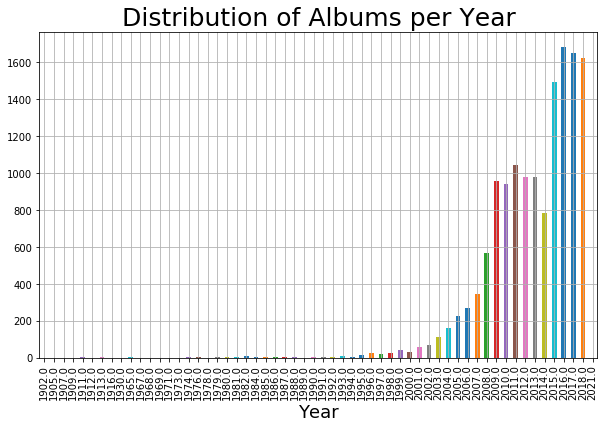

In [5]:
album_dist = albums_df.groupby(albums_df['album_date_released'].dt.year).size()

def dist_album_year():
    album_dist.plot(kind='bar')
    plt.grid()
    plt.xticks(rotation=90)

std_plot(dist_album_year, title='Distribution of Albums per Year',
         xlabel='Year')


In the graph, we can observe that the number of albums grew exponentially with the years. 
And because we want to focus on the music from 2000's forward, for this we will define our data set between the years 2000-2018.

In [6]:
start_date=pd.Timestamp(2000, 1, 1, 0)
end_date=pd.Timestamp(2018,12,12,23)
albums_df = albums_df[(albums_df.album_date_released > start_date) & (albums_df.album_date_released < end_date ) ]


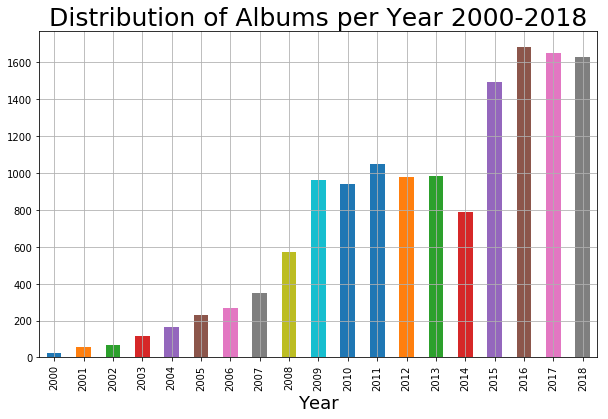

In [7]:
album_dist = albums_df.groupby(albums_df['album_date_released'].dt.year).size()

def dist_album_year():
    album_dist.plot(kind='bar')
    plt.grid()
    plt.xticks(rotation=90)

std_plot(dist_album_year, title='Distribution of Albums per Year 2000-2018',
         xlabel='Year')

<a id='3.2'></a>
###  3.2 Tracks Date Released
We do the same analysis for the tracks, first visualize to confirm that follows a similar pattern as the albums

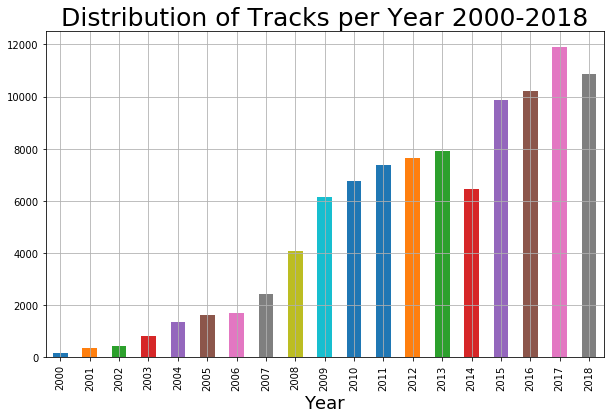

In [8]:
tracks_albums = tracks_df.merge(albums_df)
tracks_dist = tracks_albums.groupby(tracks_albums['album_date_released'].dt.year).size()
tracks_filtered = tracks_albums[(tracks_albums.album_date_released > start_date)\
                                & (tracks_albums.album_date_released < end_date ) ]

def dist_tracks_year():
    tracks_dist.plot(kind='bar')
    plt.grid()
    plt.xticks(rotation=90)

std_plot(dist_tracks_year, title='Distribution of Tracks per Year 2000-2018',
         xlabel='Year')


And like in the previous picture since the albums grow exponentialy the tracks follow the same pattern.
Now the next step is to locate which country is the one with the highset proportion of production of tracks

<a id='3.3'></a>
###  3.3 Where are the tracks produced?
We aim to find out where are tracks produced. We use the latitude and longitude artist features provided for each track.

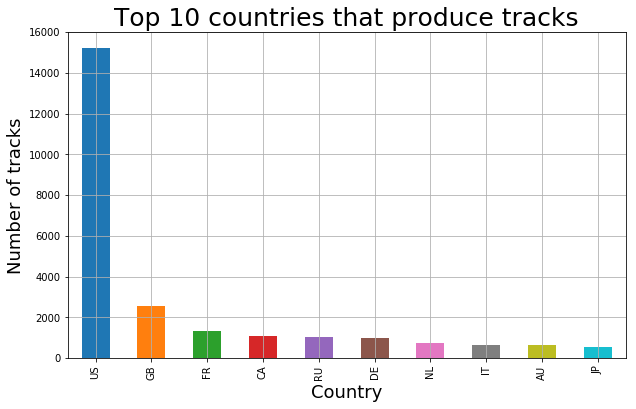

In [9]:
tracks_df = tracks_filtered
track_artist = tracks_df.merge(artists_df, left_on='artist_id', 
                               right_on='artist_id')
country_grouped = track_artist.groupby(track_artist['country']).size()
country_top10 = country_grouped.sort_values(ascending=False) \
                                     .head(10)

def country_track_top10():
    country_top10.plot(kind='bar')
    plt.ylabel('Number of Tracks')
    plt.grid()
    
std_plot(country_track_top10, title='Top 10 countries that produce tracks',
         ylabel='Number of tracks', xlabel='Country')


We can observe that the top country producing tracks is the US, with a substancial difference comparing 20000 to 5000 with the next country Great Britain.

<a id='3.4'></a>
###  3.4 Top 10 Albums
We find the top 10 albums in the analyzed time interval 2000-2018

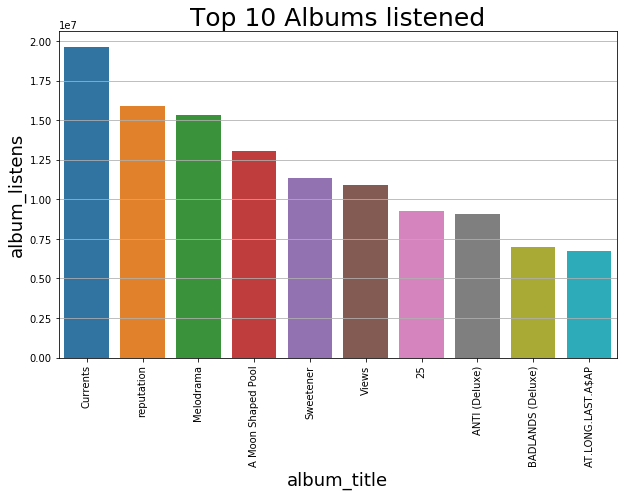

In [10]:
# albums_df=album_filtered.copy()
# albums_top10=albums_df.sort_values(by=['album_listens'],ascending=False).head(10)
albums_grouped = albums_df.groupby(albums_df['album_id']) \
                          .first()[['album_title', 'album_listens']]
albums_top10 = albums_grouped.drop_duplicates(subset='album_title').sort_values(by='album_listens', 
                                          ascending=False).head(10)

def album_listen_top10():
    plt.grid()
    sns.barplot(x='album_title', y='album_listens',
                data=albums_top10)
    plt.xticks(rotation=90)
    
std_plot(album_listen_top10, title='Top 10 Albums listened')


In [11]:
Artista=['Tame Impala', 'Taylor Swift','Lorde','Radiohead','Ariana Grande','Drake','Adele', 'Rihanna','Halsey','ASAP Rocky']
Genre=['Rock', 'Pop','Pop','Electronic','Pop','Soul-RnB','Rock','Soul-RnB','Pop','Hip-Hop']
Date=['2015','2017','2017','2016','2018','2016','2016','2016','2015','2015']
Lista=[x+', '+y+', '+z for x,y,z in zip(Artista,Genre,Date)]

albums1 = list(albums_top10.album_title)
listens1 = list(albums_top10.album_listens)

trace0 = go.Bar(
    y=listens1,
    x=albums1,
    text=Lista,
    marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.6
)


data = [trace0]
layout = {"title": "Top 10 Albums", 
          "xaxis": {"title": "Number of Listens", }, 
          "yaxis": {"title": "Albums"}}
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id='3.5'></a>
###  3.5 Top 10 Tracks
We find the top 10 tracks between years 2000 - 2018

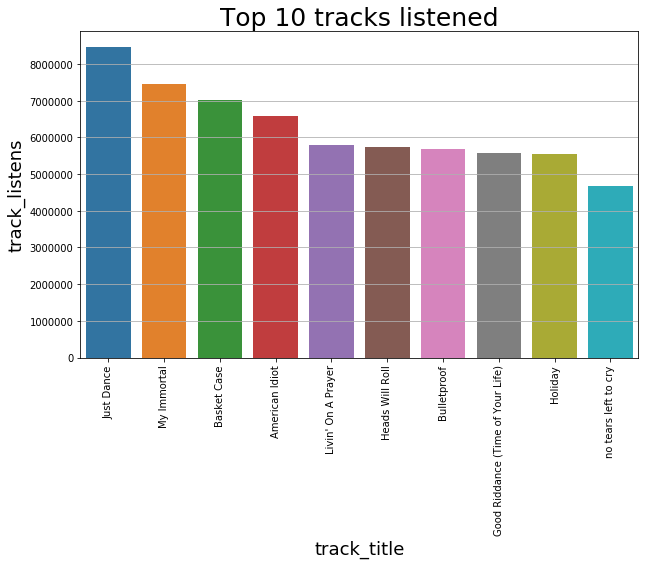

In [12]:
# tracks_df=tracks_filtered
# tracks_top10=tracks_df.sort_values(by=['track_listens'],ascending=False).head(10)

tracks_grouped = tracks_albums.groupby(tracks_df['track_id']) \
                          .first()[['track_title', 'track_listens']]
tracks_top10 = tracks_grouped.sort_values(by='track_listens', 
                                          ascending=False).head(10)

def track_listen_top10():
    plt.grid()
    sns.barplot(x='track_title', y= 'track_listens',
                data=tracks_top10)
    plt.xticks(rotation=90)
    
std_plot(track_listen_top10, title='Top 10 tracks listened')


In [13]:
tracks1 = list(tracks_top10.track_title)
listens1 = list(tracks_top10.track_listens)
Artista = ['Lady Gaga','Evanescence','Green Day','Green Day','Bon Jovi','Yeah Yeah Yeahs','La Roux','Green Day','Green Day','Ariana Grande']
Year = ['2009','1994','2000','2004','x','2009','2009','','2013','2018']
Lista = [x+', '+y for x,y in zip(Artista,Year)]
trace0 = go.Bar(
    y = listens1,
    x = tracks1,
    text = Lista,
    marker = dict(
                color = 'rgb(158,202,225)',
                line = dict(
                    color = 'rgb(8,48,107)',
                    width = 1.5),
            ),
            opacity = 0.6
)


data = [trace0]
layout = {"title": "Top 10 Tracks", 
          "xaxis": {"title": "Number of Listens", }, 
          "yaxis": {"title": "Tracks"}}
fig = go.Figure(data = data, layout = layout)
iplot(fig)

<a id='3.6'></a>
###  3.6 Clustering using Key-Features

#### Clustering using danceability, energy, valence and hotness features
Now we will try to find if there are similar tracks regarding to danceability, energy, valence and hotness, and group them;


In [14]:
def reduce_tsne(data, reduce_to=2):
    tsne = TSNE(n_components=reduce_to, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(data)
    print('TSNE Done!')
    return tsne_results

tsne_path = '{pkl}{tsne}'.format(pkl=PKL_DIR , tsne='tsne.pkl')
track_artist_reduced = tracks_df.sample(frac=0.125).merge(artists_df)

if os.path.exists(tsne_path):
    data = pd.read_pickle(tsne_path)
else:
    features = track_artist_reduced.fillna(0)[FEATURES]
    kmeans = KMeans(n_clusters=8)  
    kmeans.fit(features) 

    coord = reduce_tsne(features, reduce_to=3)

    d = {'x': coord[:, 0] , 'y': coord[:, 1], 'z': coord[:, 2], 
         'cluster': kmeans.labels_}

    data = pd.DataFrame(data=d)
    pd.to_pickle(data, tsne_path)
    
data = pd.concat([data, track_artist_reduced], axis=1)
data = data.merge(albums_df).merge(track_genre_rel_df).merge(genres_df)
data['year'] = data['album_date_released'].dt.year
data_filter = data[['x', 'y', 'z', 'cluster', 'track_title', 
                    'album_title', 'artist_name', 'genre_parent', 'year']]
data_filter.to_csv('../{csv}{file}'.format(csv=CSV_DIR, file='tsne.csv'))
data_filter.head()


,x,y,z,cluster,track_title,album_title,artist_name,genre_parent,year
0,-98.876457,16.586834,41.738186,0.0,Here With You,Blue Piano,Ed Askew,Folk,2009
1,-6.651266,-1.662142,2.683618,3.0,Rimbaud,What I Know,Ed Askew,Folk,2009
2,0.965494,0.599465,-1.203533,0.0,Moo-Hoo,Dark Country Magic,Big Blood,Folk,2010
3,46.796028,-28.495293,-13.118205,0.0,Oh My Child,Dark Country Magic,Big Blood,Folk,2010
4,-43.630672,37.414322,-27.300266,0.0,Reverse Hymnal,Dark Country Magic,Big Blood,Folk,2010


<a id='3.7'></a>
###  3.7 Correlation Analysis
<a id='3.7.1'></a>
#### 3.7.1 Relation between danceability and duration of the song
Now we will try to find correlation between different features of the tracks, in this case the danceability and the duration of the song

In [15]:
tracks_df.insert(loc=13, column='track_duration_minutes',
                 value=(tracks_df['track_duration'] / 60))

tracks_df['track_duration_minutes'] = pd.to_numeric( \
                                            tracks_df['track_duration_minutes'])


C:\Users\Andres Montero\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



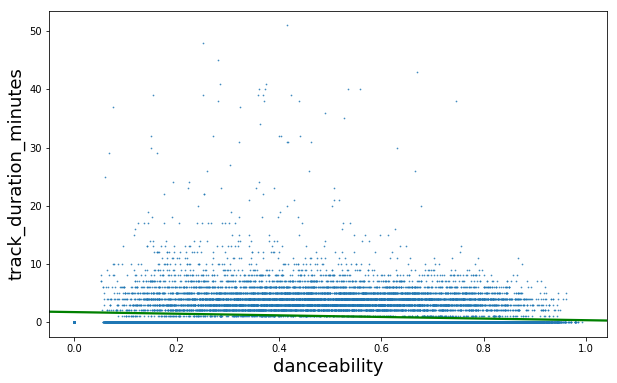

In [16]:
tracks_df['track_duration_minutes'] = tracks_df['track_duration_minutes'] \
                                                .apply(lambda x : np.rint(x))

def danceability_track_duration():
    sns.regplot(x='danceability', y='track_duration_minutes',
                data=tracks_df, ci=95, 
                line_kws = {'color': 'green'},
                scatter_kws={'s': 0.5})
    
std_plot(danceability_track_duration)


In the previous plot we can see that there is no clear correlation between danceability and the duration of the tracks, and to support this hypthesis we calculate the Spearman and Pearson Coefficient

In [17]:
tracks_df_correlation = tracks_df.dropna()
spearman_coeff = stats.spearmanr(tracks_df_correlation['danceability'], 
                                 tracks_df_correlation['track_duration_minutes'])
print('The spearman correlation is: {}'.format(spearman_coeff))


The spearman correlation is: SpearmanrResult(correlation=-0.060766632475942106, pvalue=8.288526842333769e-05)


In [18]:
pearson_coeff = stats.pearsonr(tracks_df_correlation['danceability'], 
                                 tracks_df_correlation['track_duration_minutes'])
print('The pearson correlation is: {}'.format(pearson_coeff))

The pearson correlation is: (-0.11393933329755772, 1.3906889993226056e-13)


* With the previous results of the Spearman and Pearson coefficients, we conclude that there is no direct strong correlation between the duration of the tracks and the danceability


<a id='3.7.2'></a>
#### 3.7.2 Relation between Valence-Danceability

One of the key features of the tracks is "Valence", which refers to the degree of positive or negative emotions one perceives from a song. We'll try to find some relations between this feature and the other key features "Danceability" and "Energy".


C:\Users\Andres Montero\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



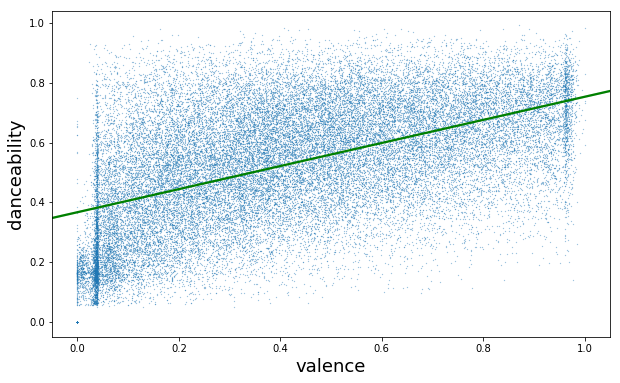

In [19]:
def danceability_valence():
    sns.regplot(x='valence', y='danceability',
                data=tracks_df, ci=95, 
                line_kws = {'color': 'green'},
                scatter_kws={'s': 0.05})
    
std_plot(danceability_valence)


As we can observe in the previous plot there is a moderate positive correlation between the valence and danceability, to confirm this we calculate the Spearman and Pearson correlation.

In [20]:
spearman_coeff = stats.spearmanr(tracks_df_correlation['valence'], 
                                 tracks_df_correlation['danceability'])
print('The spearman correlation is: {}'.format(spearman_coeff))


The spearman correlation is: SpearmanrResult(correlation=0.4642506491085091, pvalue=4.657841876096804e-223)


In [21]:
pearson_coeff = stats.pearsonr(tracks_df_correlation['valence'], 
                                 tracks_df_correlation['danceability'])
print('The pearson correlation is: {}'.format(pearson_coeff))

The pearson correlation is: (0.4643482734097751, 3.6559097447239514e-223)


* With the previous results of the Spearman and Pearson coefficients, we conclude that there is moderate correlation between the valence and the danceability of a track

<a id='3.7.3'></a>
#### 3.7.3 Relation between Valence-Energy

C:\Users\Andres Montero\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



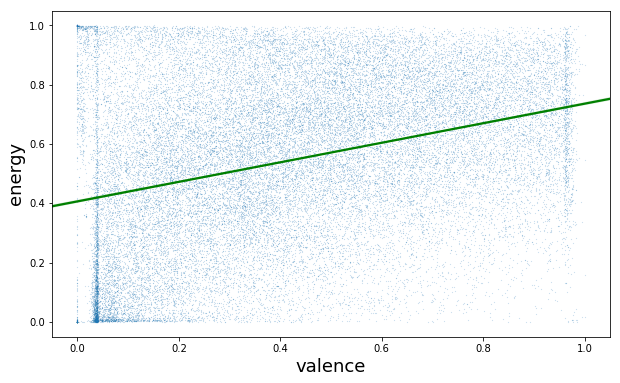

In [22]:
def track_listen_valence():
    sns.regplot(x='valence', y='energy',
                data=tracks_df, ci=95, 
                line_kws ={'color': 'green'}, 
                scatter_kws={'s': 0.01})
    
std_plot(track_listen_valence)


In [23]:
spearman_coeff = stats.spearmanr(tracks_df_correlation['valence'], 
                                 tracks_df_correlation['energy'])
print('The spearman correlation is: {}'.format(spearman_coeff))


The spearman correlation is: SpearmanrResult(correlation=0.15459554476098686, pvalue=7.922690539152465e-24)


In [24]:
pearson_coeff = stats.pearsonr(tracks_df_correlation['valence'], 
                                 tracks_df_correlation['energy'])
print('The pearson correlation is: {}'.format(pearson_coeff))

The pearson correlation is: (0.1630679738877856, 2.3182074323071108e-26)


* With the previous results of the Spearman and Pearson coefficients, we conclude that there is low correlation between the valence and the energy of a track

<a id='3.8'></a>
### 3.8 Top tracks/genres by key features

<a id='3.8.1'></a>
#### 3.8.1 Valence per Genre

As we have seen in the previous plot, valence has correlation between Energy and Danceability, so we conclude that this is an important feature and we will make a plot with the top genres with the highest average valence

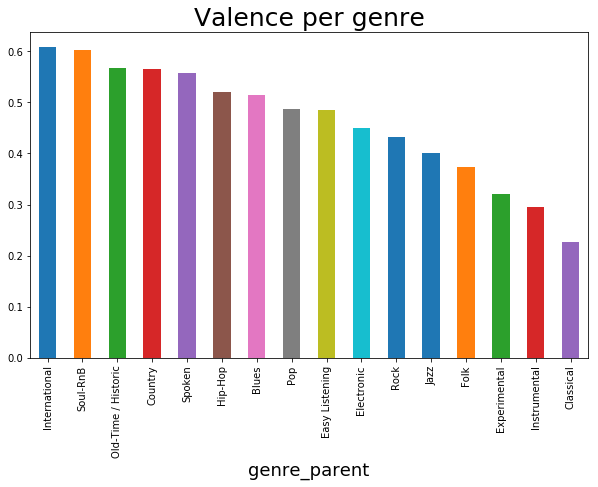

In [25]:
track_rel = tracks_df.merge(track_genre_rel_df)
track_genre = track_rel.merge(genres_df)
genre_valence = track_genre.groupby('genre_parent')['valence'].mean()

top10_genre_valence = genre_valence.sort_values(ascending=False)

def genre_valence_top10():
    top10_genre_valence.plot(kind='bar')
       
std_plot(genre_valence_top10, title='Valence per genre')

As we can see in the previous graph the genre with the highest average valence is "International".

<a id='3.8.2'></a>
#### 3.8.2 Genres by # of tracks

Then we will focus to see which genre was the one with the most releases per year.

In [26]:
track_genre_album = track_genre.merge(albums_df)

genre_year = track_genre_album[['genre_parent', 'album_date_released']]
genre_year.insert(loc=2, column='album_released_year',
                  value=(genre_year['album_date_released'].dt.year))


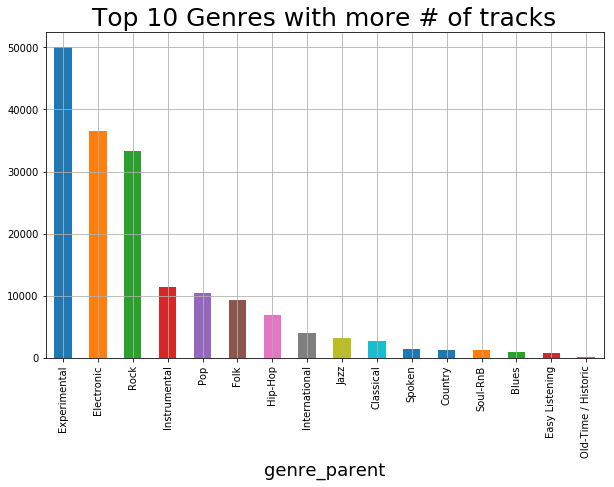

In [27]:
top_genre = genre_year.groupby(genre_year['genre_parent']).size()
top_genre_sorted = top_genre.sort_values(ascending=False)

def genres_num_track_top10():
    top_genre_sorted.plot(kind='bar')
    plt.grid()

std_plot(genres_num_track_top10,
         title='Top 10 Genres with more # of tracks')

We can observe that the genre with the highest number of tracks is experimental followed closely by electronic

<a id='3.8.3'></a>
#### 3.8.3 Genres by popularity

The next plot shows the top 10 Genres according to the popularity of that song, this is a key plot as we will observe that is the top genre over the las 18 years according to the "Hotness" of the artist and the tracks.

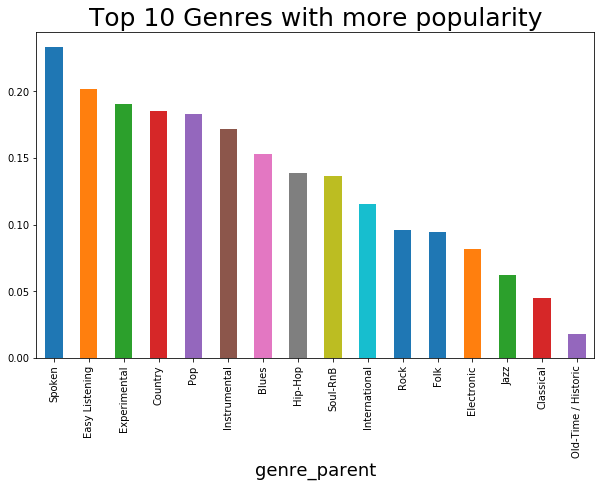

In [28]:
# Top Genres with more popularity
genre_popularity = track_genre.groupby('genre_parent')['song_hotness'].mean()
top10_genre_popularity = genre_popularity.sort_values(ascending=False)

def genre_popularity_top10():
    top10_genre_popularity.plot(kind='bar')
    
std_plot(genre_popularity_top10, 
         title='Top 10 Genres with more popularity')


We can observe that the most popular genre according to the "Hotness" is Spoken, which is a emerging genre specially on Spotify.

<a id='3.8.4'></a>
#### 3.8.4 Top Artirst since 2000s

The next section is to analyze the top artists over the las 18 years, this analysis will be separated depending on the :

-Artist_Hotness, -Track_Hotness and -Barplots over each year to see the evolution 

<Figure size 720x432 with 0 Axes>

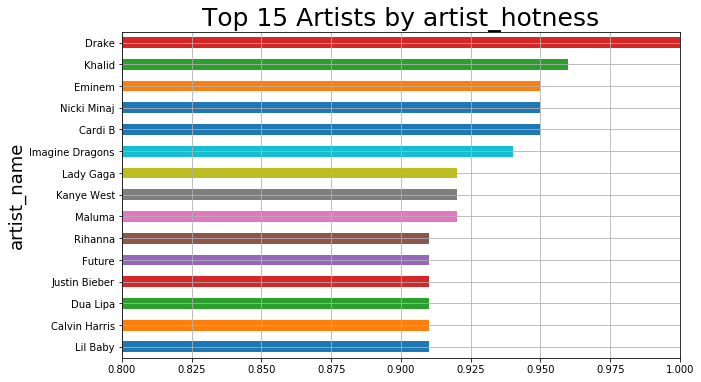

In [29]:
# Top 10 artists by artists_hotness
top10_artists = artists_df[['artist_name', 'artist_hotness']] \
                    .sort_values(by='artist_hotness',
                                 ascending=False).head(15)

def artists_top10():
    return top10_artists.sort_values(by='artist_hotness',ascending=True).plot.barh(x='artist_name',
    y='artist_hotness',xlim=(0.8,1),legend=False, grid=True)
std_plot(artists_top10, title='Top 15 Artists by artist_hotness')


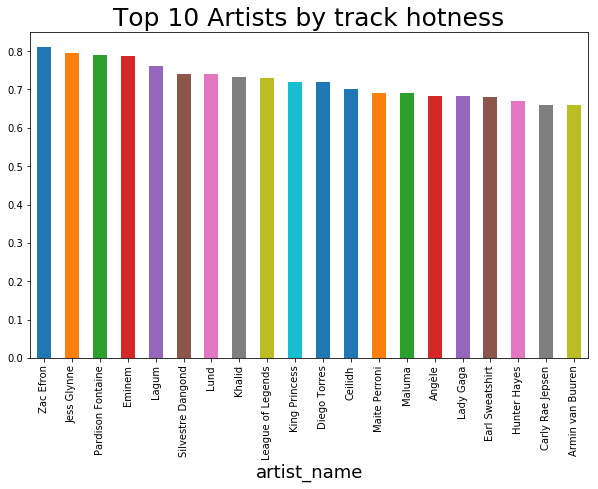

In [30]:
# Top 10 artists by tracks popularity
track_artist = tracks_df.merge(artists_df)
track_hotness_artist = track_artist.groupby('artist_name')['song_hotness'].mean()
top10_artists = track_hotness_artist.sort_values(ascending=False).head(20)

def artists_top10():
    top10_artists.plot(kind='bar')
    
std_plot(artists_top10, title='Top 10 Artists by track hotness')


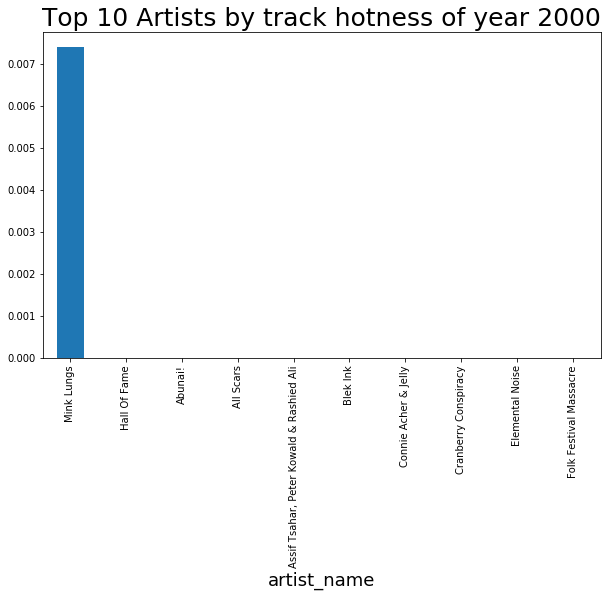

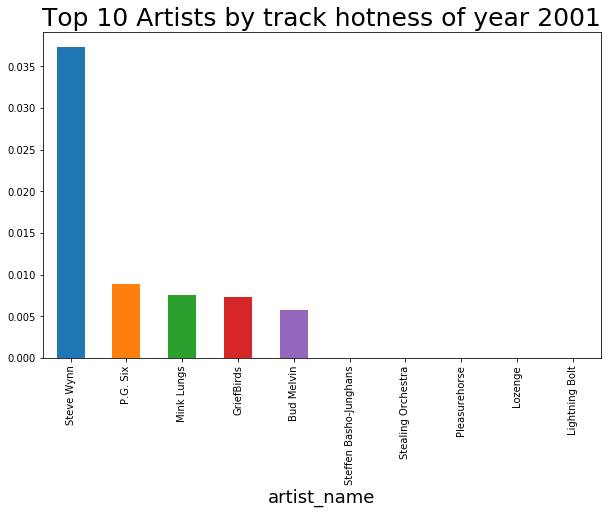

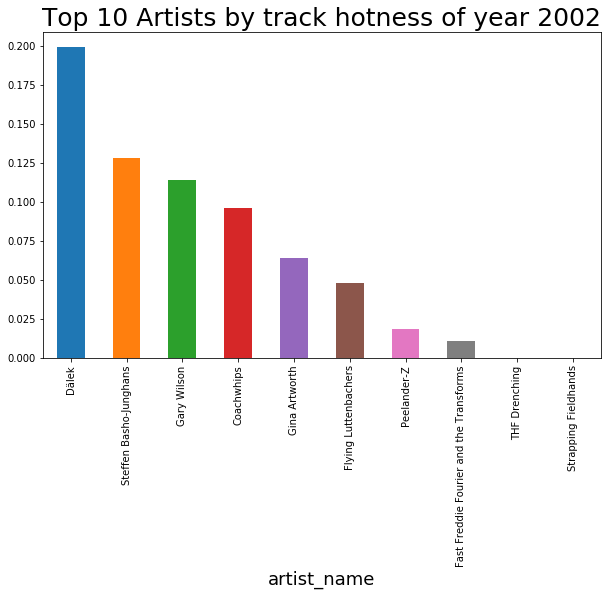

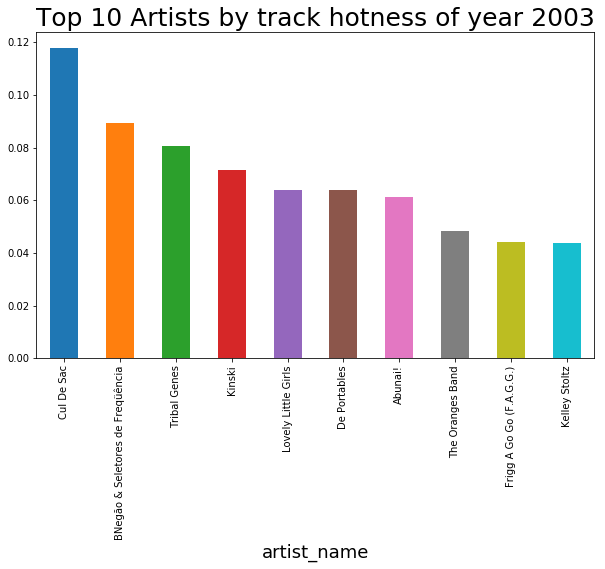

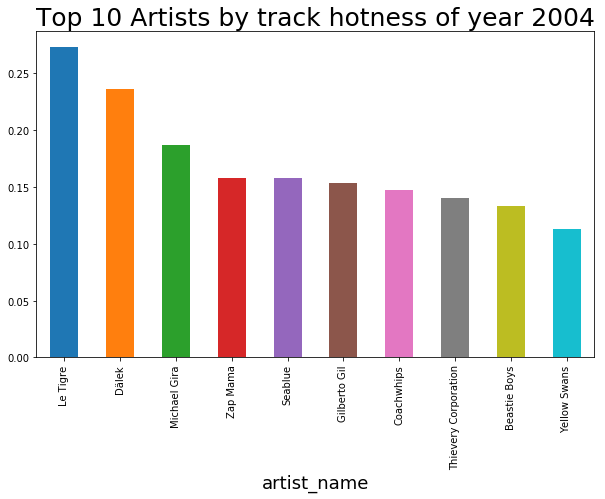

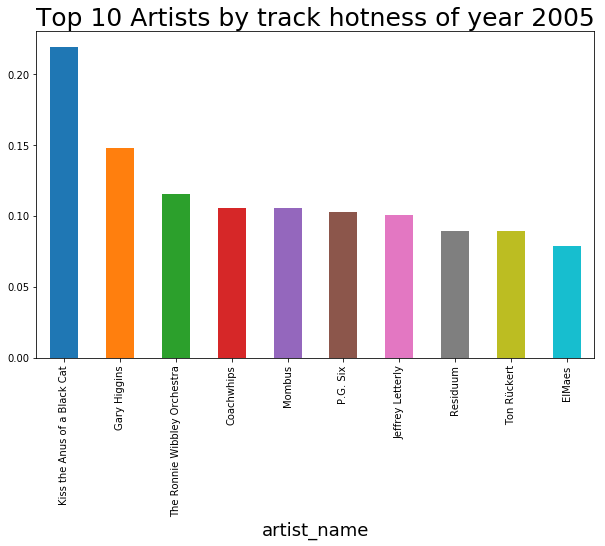

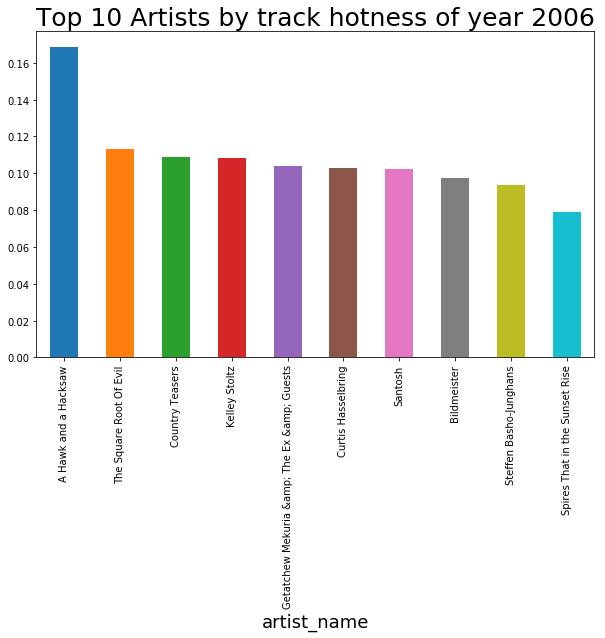

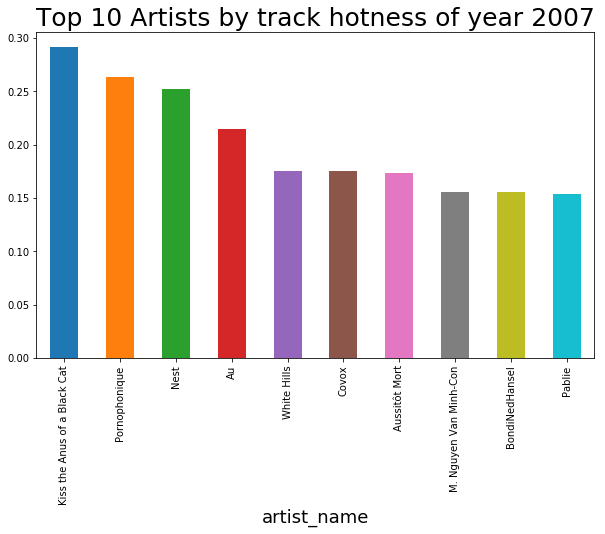

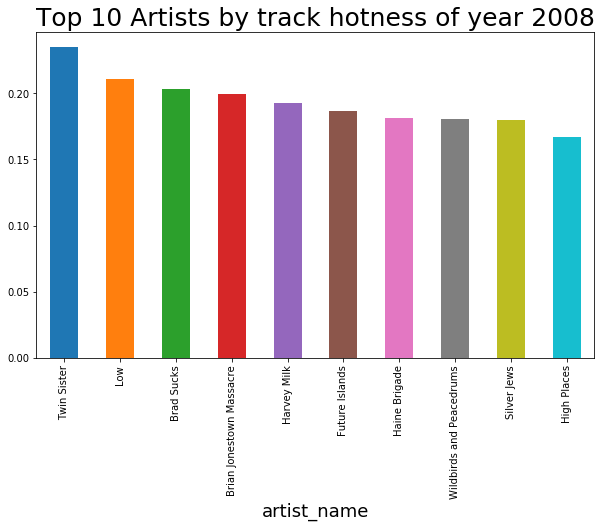

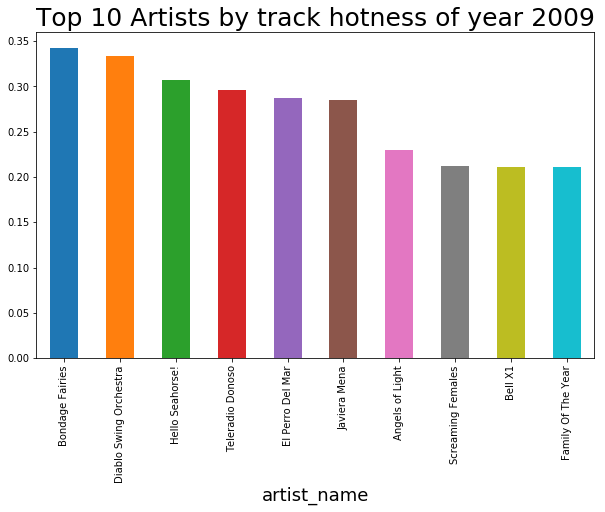

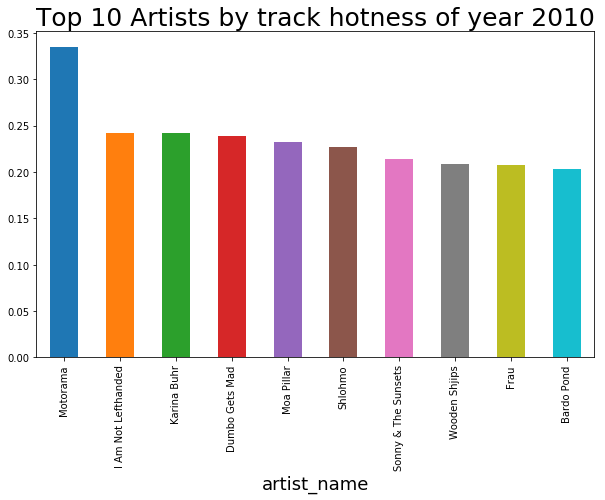

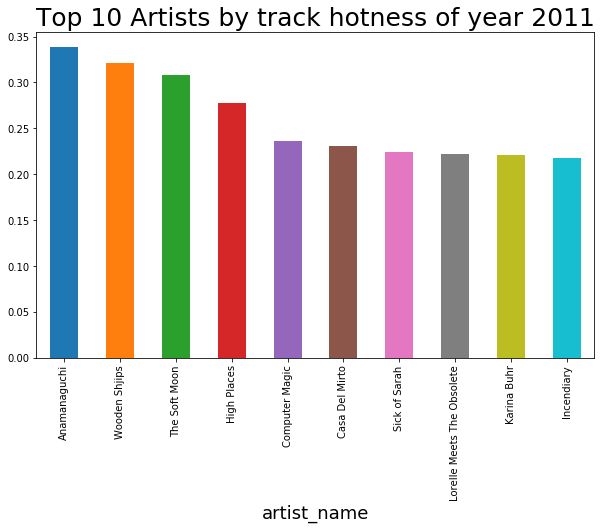

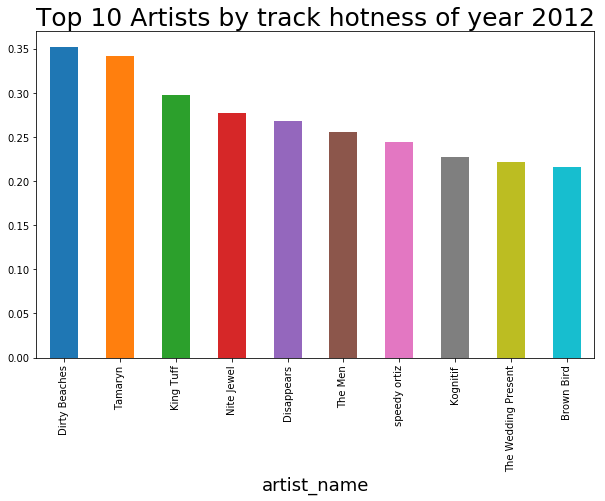

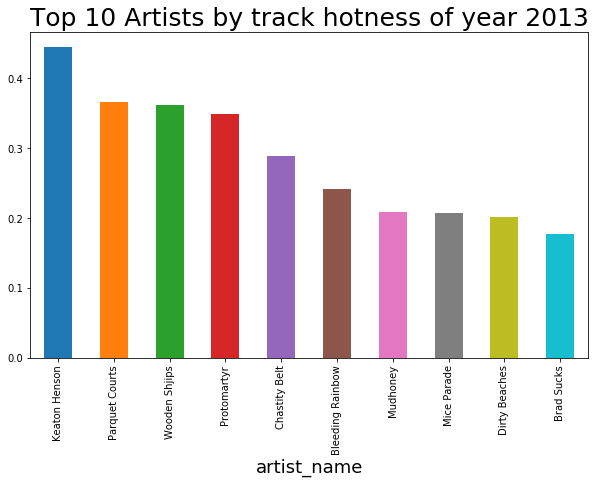

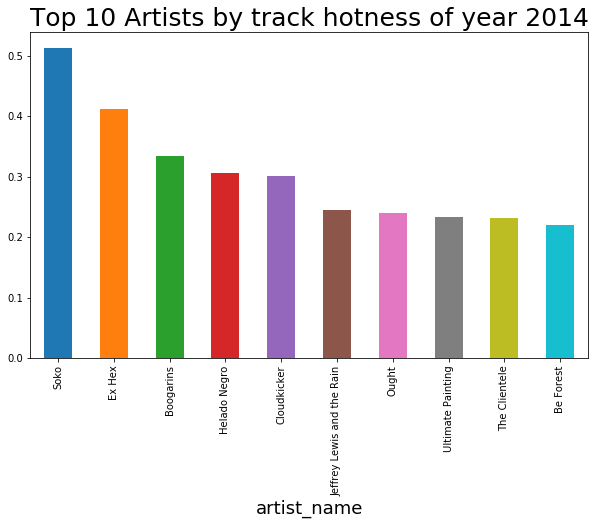

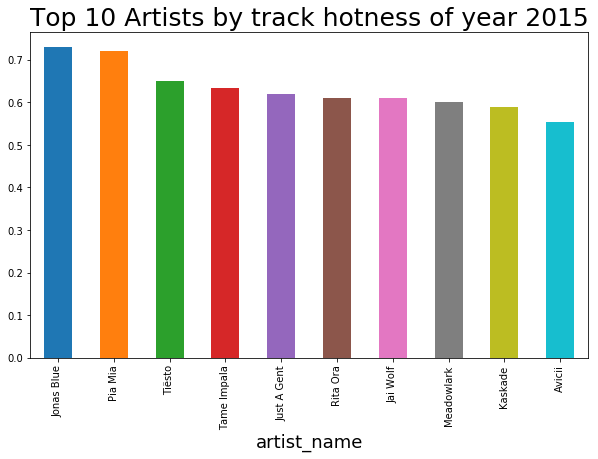

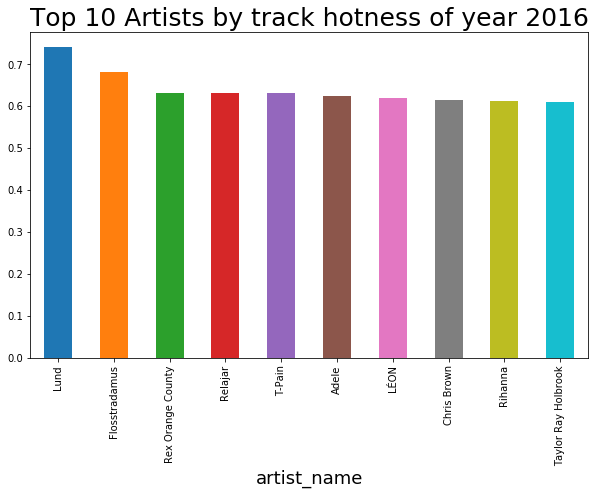

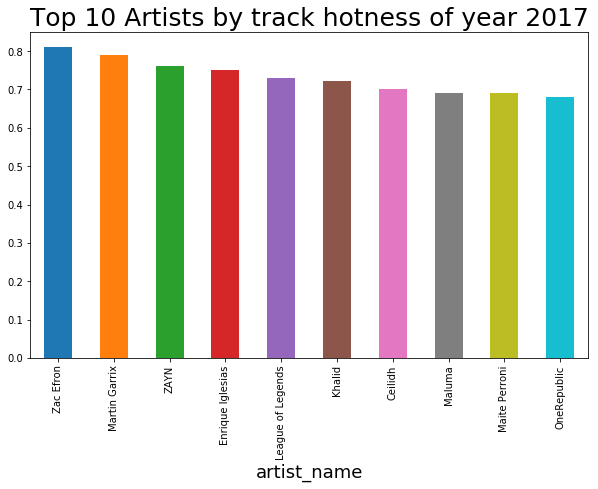

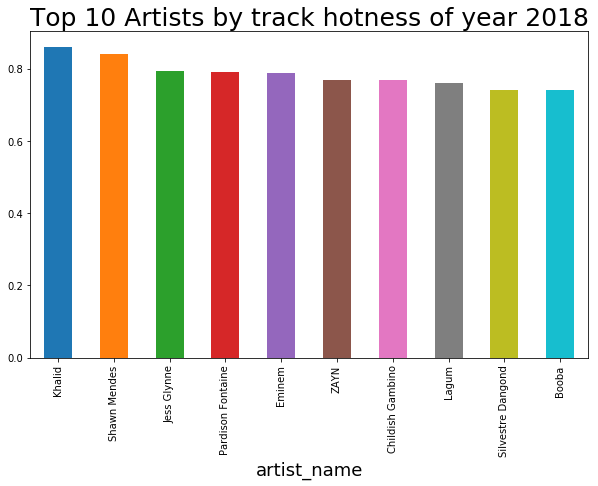

In [31]:
# Top Artists Evolution since 2000 by year
tracks_albums_artists = tracks_df.merge(albums_df).merge(artists_df)

for year in range(2000, 2019):
    is_from_year = tracks_albums_artists['album_date_released'].dt.year == year
    filter_tracks = tracks_albums_artists[is_from_year]
    
    track_hotness_artist = filter_tracks.groupby('artist_name')['song_hotness'].mean()
    top10_artists = track_hotness_artist.sort_values(ascending=False).head(10)

    def artists_top10():
        top10_artists.plot(kind='bar')

    std_plot(artists_top10, title='Top 10 Artists by track hotness of year {}'.format(year))
    

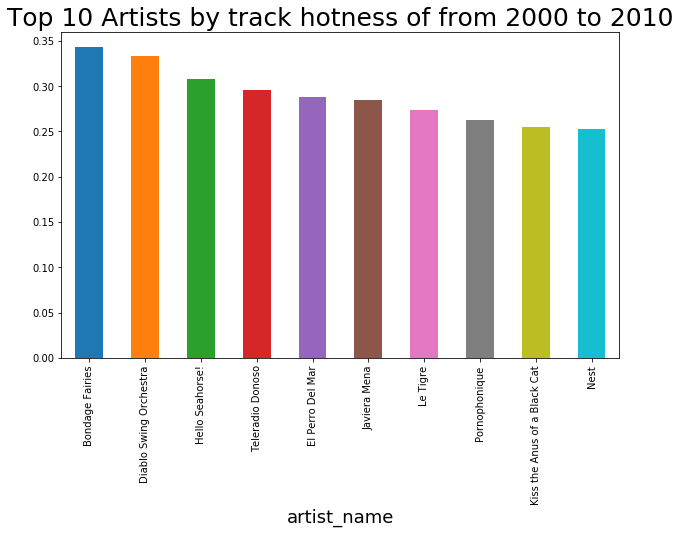

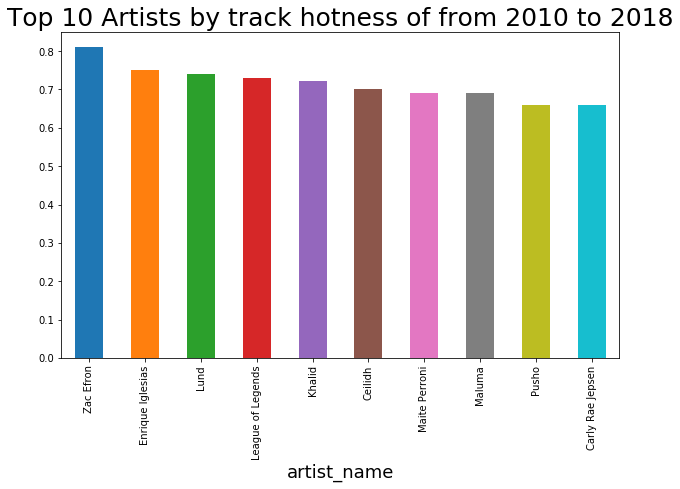

In [32]:
# Top Artists Evolution since 2000 by year interval
interval_y = [(2000, 2010), (2010, 2018)]

for from_y, to_y in interval_y:
    album_released_year = tracks_albums_artists['album_date_released'].dt.year
    from_y_cond =  album_released_year >= from_y
    to_y_cond = album_released_year < to_y
    is_from_to_y = from_y_cond & to_y_cond
    filter_tracks = tracks_albums_artists[is_from_to_y]
    
    track_hotness_artist = filter_tracks.groupby('artist_name')['song_hotness'].mean()
    top10_artists = track_hotness_artist.sort_values(ascending=False).head(10)

    def artists_top10():
        top10_artists.plot(kind='bar')

    std_plot(artists_top10, 
             title='Top 10 Artists by track hotness of from {from_y} to {to_y}'.format(from_y=from_y,
                                                                                       to_y=to_y))

<a id='4'></a>
##  4 Evolution of music Valence/Energy/Danceability

This section is to analyze the evolution of the music depending on the key features of "Valence", "Energy" and "Danceability".

In [33]:
tracks_albums = tracks_df.merge(albums_df, how='inner')

We will focus on the the seasons evolution: "Summer", "Winter", "Spring", "Autum" and the "Total" evolution so that we can compare them 

In [34]:
tracks_albums_summer = tracks_albums.loc[lambda tracks_albums: (tracks_albums.album_date_released.dt.month >5)\
                 & (tracks_albums.album_date_released.dt.month <9)]
tracks_albums_winter = tracks_albums.loc[lambda tracks_albums: ((tracks_albums.album_date_released.dt.month >11)\
                 | (tracks_albums.album_date_released.dt.month <3))]
tracks_albums_spring = tracks_albums.loc[lambda tracks_albums: (tracks_albums.album_date_released.dt.month >2)\
                 & (tracks_albums.album_date_released.dt.month <6)]
tracks_albums_autumn = tracks_albums.loc[lambda tracks_albums: (tracks_albums.album_date_released.dt.month >8)\
                 & (tracks_albums.album_date_released.dt.month <12)]


<a id='4.1'></a>
### 4.1 Valence 2000-2018

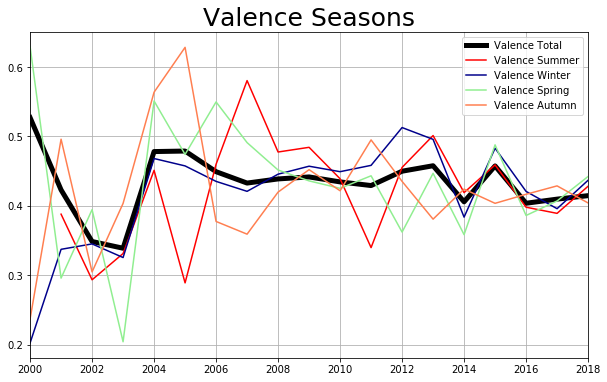

In [35]:
#summer
tracks_albums_summer_year = tracks_albums_summer.groupby([(tracks_albums_summer['album_date_released'].dt.year.rename('year')),\
                          (tracks_albums_summer['album_date_released'].dt.month.rename('month'))]).mean()

tracks_albums_summer_year_mean = tracks_albums_summer_year.groupby('year').mean()
tracks_albums_summer_year_mean_valence = tracks_albums_summer_year_mean[['valence']]

# winter

tracks_albums_winter_year = tracks_albums_winter.groupby([(tracks_albums_winter['album_date_released'].dt.year.rename('year')),\
                          (tracks_albums_winter['album_date_released'].dt.month.rename('month'))]).mean()

tracks_albums_winter_year_mean = tracks_albums_winter_year.groupby('year').mean()
tracks_albums_winter_year_mean_valence = tracks_albums_winter_year_mean[['valence']]

#spring
tracks_albums_spring_year = tracks_albums_spring.groupby([(tracks_albums_spring['album_date_released'].dt.year.rename('year')),\
                          (tracks_albums_spring['album_date_released'].dt.month.rename('month'))]).mean()

tracks_albums_spring_year_mean = tracks_albums_spring_year.groupby('year').mean()
tracks_albums_spring_year_mean_valence = tracks_albums_spring_year_mean[['valence']]

#autumn
tracks_albums_autumn_year = tracks_albums_autumn.groupby([(tracks_albums_autumn['album_date_released'].dt.year.rename('year')),\
                          (tracks_albums_autumn['album_date_released'].dt.month.rename('month'))]).mean()

tracks_albums_autumn_year_mean = tracks_albums_autumn_year.groupby('year').mean()
tracks_albums_autumn_year_mean_valence = tracks_albums_autumn_year_mean[['valence']]

tracks_albums_total = tracks_albums.groupby([(tracks_albums['album_date_released'].dt.year.rename('year'))\
                                                           ]).mean()
tracks_albums_total_valence = tracks_albums_total[['valence']]

def valence_seasons():
    plt.grid()
    plt.xlim(2000,2018)
    sns.lineplot(data=tracks_albums_total_valence["valence"],
                 color="black", label="Valence Total", linewidth=5)
    sns.lineplot(data=tracks_albums_summer_year_mean_valence["valence"],
                 color="red", label="Valence Summer")
    sns.lineplot(data=tracks_albums_winter_year_mean_valence["valence"], 
                 color="darkblue", label="Valence Winter")
    sns.lineplot(data=tracks_albums_spring_year_mean_valence["valence"], 
                 color="lightgreen", label="Valence Spring")
    return sns.lineplot(data=tracks_albums_autumn_year_mean_valence["valence"], 
                        color="coral", label="Valence Autumn")

std_plot(valence_seasons, title='Valence Seasons')


From the previous graphic we can observe that the valence of the music in general had a significant decrease from the 2000 until 2002, then there is a rise around 2004 and after that remains estable between 0.4 and 0.5

<a id='4.2'></a>
### 4.2 Danceability 2000-2018

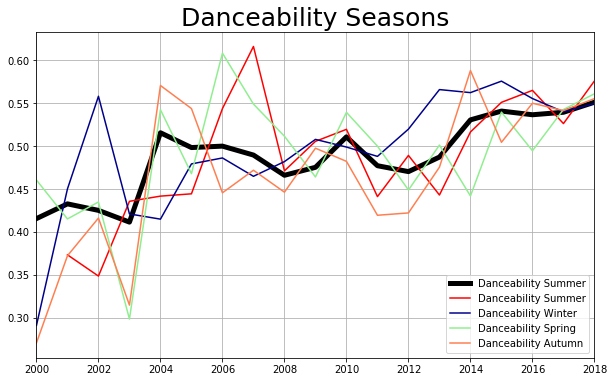

In [36]:
tracks_albums_summer_year_mean = tracks_albums_summer_year.groupby('year').mean()
tracks_albums_summer_year_mean_danceability = tracks_albums_summer_year_mean[['danceability']]

tracks_albums_winter_year_mean = tracks_albums_winter_year.groupby('year').mean()
tracks_albums_winter_year_mean_danceability = tracks_albums_winter_year_mean[['danceability']]

tracks_albums_spring_year_mean = tracks_albums_spring_year.groupby('year').mean()
tracks_albums_spring_year_mean_danceability = tracks_albums_spring_year_mean[['danceability']]

tracks_albums_autumn_year_mean = tracks_albums_autumn_year.groupby('year').mean()
tracks_albums_autumn_year_mean_danceability = tracks_albums_autumn_year_mean[['danceability']]

tracks_albums_total = tracks_albums.groupby([(tracks_albums['album_date_released'].dt.year.rename('year'))\
                                                           ]).mean()
tracks_albums_total_valence = tracks_albums_total[['danceability']]

def valence_seasons():
    plt.grid()
    plt.xlim(2000,2018)
    sns.lineplot(data=tracks_albums_total_valence["danceability"], 
                 color="black", label="Danceability Summer", linewidth=5)
    sns.lineplot(data=tracks_albums_summer_year_mean_danceability["danceability"], 
                 color="red", label="Danceability Summer")
    sns.lineplot(data=tracks_albums_winter_year_mean_danceability["danceability"],
                 color="darkblue", label="Danceability Winter")
    sns.lineplot(data=tracks_albums_spring_year_mean_danceability["danceability"], 
                 color="lightgreen", label="Danceability Spring")
    return sns.lineplot(data=tracks_albums_autumn_year_mean_danceability["danceability"],
                        color="coral", label="Danceability Autumn")

std_plot(valence_seasons, title='Danceability Seasons')


From the previous graphic we can observe that the danceability of the music increased since the 2000's, with almost doubled value in 2018, the season of the year were the most danceably songs are realeased is winter as you can observe in the previous plot (blue line).

<a id='4.3'></a>
### 4.3 Energy 2000-2018

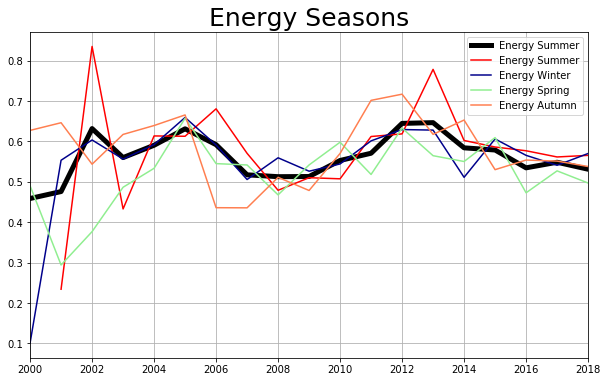

In [37]:
tracks_albums_summer_year_mean = tracks_albums_summer_year.groupby('year').mean()
tracks_albums_summer_year_mean_energy = tracks_albums_summer_year_mean[['energy']]

tracks_albums_winter_year_mean = tracks_albums_winter_year.groupby('year').mean()
tracks_albums_winter_year_mean_energy = tracks_albums_winter_year_mean[['energy']]

tracks_albums_spring_year_mean = tracks_albums_spring_year.groupby('year').mean()
tracks_albums_spring_year_mean_energy = tracks_albums_spring_year_mean[['energy']]

tracks_albums_autumn_year_mean = tracks_albums_autumn_year.groupby('year').mean()
tracks_albums_autumn_year_mean_energy = tracks_albums_autumn_year_mean[['energy']]

tracks_albums_total = tracks_albums.groupby([(tracks_albums['album_date_released'].dt.year.rename('year'))\
                                                           ]).mean()
tracks_albums_total_valence = tracks_albums_total[['energy']]

def energy_seasons():
    plt.grid()
    plt.xlim(2000,2018)
    sns.lineplot(data=tracks_albums_total_valence["energy"], 
                 color="black", label="Energy Summer", linewidth=5)
    sns.lineplot(data=tracks_albums_summer_year_mean_energy["energy"], 
                 color="red", label="Energy Summer")
    sns.lineplot(data=tracks_albums_winter_year_mean_energy["energy"],
                 color="darkblue", label="Energy Winter")
    sns.lineplot(data=tracks_albums_spring_year_mean_energy["energy"],
                 color="lightgreen", label="Energy Spring")
    return sns.lineplot(data=tracks_albums_autumn_year_mean_energy["energy"],
                        color="coral", label="Energy Autumn")

std_plot(energy_seasons, title='Energy Seasons')


The highest period in terms of energy of the music is around 2012 with a value of almost 0.65, however this value decreased in the last years, and is showing a decreassing trend as you can observe in the previous plot.


The following section will explain with more detailed the evolution of the key features of the tracks, now we impliment categorical values to group every two years in order to reduce noise, first we will analyze the tracks from __2000-2010__ and then from __2010-2018__.

<a id='4.4'></a>
### 4.4 Valence 2000-2010 


In [38]:
#sumer
tracks_albums_summer_2000 = tracks_albums.loc[lambda tracks_albums: (tracks_albums.album_date_released.dt.month >5)\
                 & (tracks_albums.album_date_released.dt.month <9) \
                 & (tracks_albums.album_date_released.dt.year >1999)\
                 & (tracks_albums.album_date_released.dt.year <2010)]
tracks_albums_summer_2000 = tracks_albums_summer_2000.copy()
tracks_albums_summer_2000['categorical_year'] = pd.cut(tracks_albums_summer_2000['album_date_released'].dt.year, \
                                                       [2000, 2002, 2004, 2006, 2008, 2010], \
                                                       labels=[2002, 2004, 2006, 2008, 2010])
tracks_albums_summer_2000_year = tracks_albums_summer_2000.groupby('categorical_year').mean()

#winter
tracks_albums_winter_2000 = tracks_albums.loc[lambda tracks_albums: ((tracks_albums.album_date_released.dt.month <3)\
                 | (tracks_albums.album_date_released.dt.month >11)) \
                 & (tracks_albums.album_date_released.dt.year >1999)\
                 & (tracks_albums.album_date_released.dt.year <2010)]
tracks_albums_winter_2000 = tracks_albums_winter_2000.copy()
tracks_albums_winter_2000['categorical_year'] = pd.cut(tracks_albums_winter_2000['album_date_released'].dt.year, \
                                                        [2000, 2002, 2004, 2006, 2008, 2010], \
                                                       labels=[2002, 2004, 2006, 2008, 2010])
tracks_albums_winter_2000_year = tracks_albums_winter_2000.groupby('categorical_year').mean()

#spring
tracks_albums_spring_2000 = tracks_albums.loc[lambda tracks_albums: (tracks_albums.album_date_released.dt.month >2)\
                 & (tracks_albums.album_date_released.dt.month <6) \
                 & (tracks_albums.album_date_released.dt.year >1999)\
                 & (tracks_albums.album_date_released.dt.year <2010)]
tracks_albums_spring_2000 = tracks_albums_spring_2000.copy()
tracks_albums_spring_2000['categorical_year'] = pd.cut(tracks_albums_spring_2000['album_date_released'].dt.year, \
                                                        [2000, 2002, 2004, 2006, 2008, 2010], \
                                                       labels=[2002, 2004, 2006, 2008, 2010])
tracks_albums_spring_2000_year = tracks_albums_spring_2000.groupby('categorical_year').mean()

#autumn
tracks_albums_autumn_2000 = tracks_albums.loc[lambda tracks_albums: (tracks_albums.album_date_released.dt.month >8)\
                 & (tracks_albums.album_date_released.dt.month <12) \
                 & (tracks_albums.album_date_released.dt.year >1999)\
                 & (tracks_albums.album_date_released.dt.year <2010)]
tracks_albums_autumn_2000 = tracks_albums_autumn_2000.copy()
tracks_albums_autumn_2000['categorical_year'] = pd.cut(tracks_albums_autumn_2000['album_date_released'].dt.year, \
                                                        [2000, 2002, 2004, 2006, 2008, 2010], \
                                                       labels=[2002, 2004, 2006, 2008, 2010])
tracks_albums_autumn_2000_year = tracks_albums_autumn_2000.groupby('categorical_year').mean()

#total
tracks_albums_total_2000 = tracks_albums.loc[lambda tracks_albums:(tracks_albums.album_date_released.dt.year >1999)\
                 & (tracks_albums.album_date_released.dt.year <2010)]
tracks_albums_total_2000 = tracks_albums_total_2000.copy()
tracks_albums_total_2000['categorical_year'] = pd.cut(tracks_albums_total_2000['album_date_released'].dt.year, \
                                                        [2000, 2002, 2004, 2006, 2008, 2010], \
                                                       labels=[2002, 2004, 2006, 2008, 2010])
tracks_albums_total_2000_year = tracks_albums_total_2000.groupby('categorical_year').mean()





#summer
tracks_albums_summer_2000_year_mean = tracks_albums_summer_2000_year.groupby('categorical_year').mean()
tracks_albums_summer_2000_year_mean_valence = tracks_albums_summer_2000_year_mean[['valence']]
#winter
tracks_albums_winter_2000_year_mean = tracks_albums_winter_2000_year.groupby('categorical_year').mean()
tracks_albums_winter_2000_year_mean_valence = tracks_albums_winter_2000_year_mean[['valence']]
#spring
tracks_albums_spring_2000_year_mean = tracks_albums_spring_2000_year.groupby('categorical_year').mean()
tracks_albums_spring_2000_year_mean_valence = tracks_albums_spring_2000_year_mean[['valence']]
#autumn
tracks_albums_autumn_2000_year_mean = tracks_albums_autumn_2000_year.groupby('categorical_year').mean()
tracks_albums_autumn_2000_year_mean_valence = tracks_albums_autumn_2000_year_mean[['valence']]
#total
tracks_albums_total_2000_mean = tracks_albums_total_2000_year.groupby('categorical_year').mean()
tracks_albums_total_2000_mean_valence = tracks_albums_total_2000_mean[['valence']]



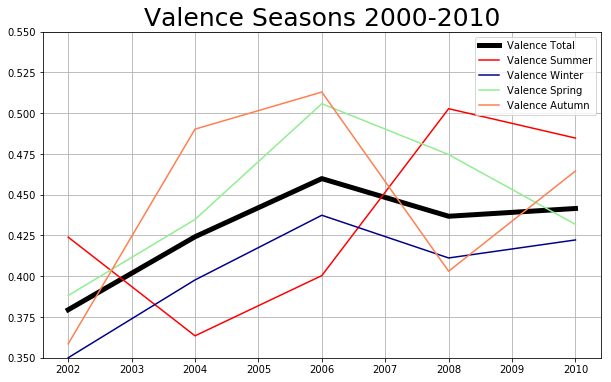

In [39]:
def valence_seasons_00_10_categorical():
    plt.grid()
    plt.ylim(0.35, 0.55)
    sns.lineplot(data=tracks_albums_total_2000_mean_valence["valence"], 
                 color="black", label="Valence Total", linewidth=5,)
    sns.lineplot(data=tracks_albums_summer_2000_year_mean_valence["valence"], 
                 color="red", label="Valence Summer")
    sns.lineplot(data=tracks_albums_winter_2000_year_mean_valence["valence"],
                 color="darkblue", label="Valence Winter")
    sns.lineplot(data=tracks_albums_spring_2000_year_mean_valence["valence"], 
                 color="lightgreen", label="Valence Spring")
    return sns.lineplot(data=tracks_albums_autumn_2000_year_mean_valence["valence"], 
                        color="coral", label="Valence Autumn")

std_plot(valence_seasons_00_10_categorical, title='Valence Seasons 2000-2010')
export_line_viz([tracks_albums_total_2000_mean_valence, 
                 tracks_albums_summer_2000_year_mean_valence,
                 tracks_albums_winter_2000_year_mean_valence, 
                 tracks_albums_spring_2000_year_mean_valence,
                 tracks_albums_autumn_2000_year_mean_valence], 
                 'valence1')


In the previous plot we can observe that the valence of the tracks increased from the 2002 until 2006, then it had a small decrease until 2008 and since then has remained stable.

<a id='4.5'></a>
### 4.5 Danceability 2000-2010 

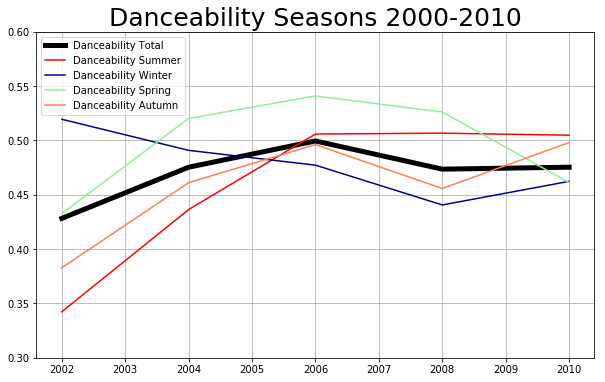

In [40]:
#summer
tracks_albums_summer_2000_year_mean = tracks_albums_summer_2000_year.groupby('categorical_year').mean()
tracks_albums_summer_2000_year_mean_dancebility = tracks_albums_summer_2000_year_mean[['danceability']]

#winter
tracks_albums_winter_2000_year_mean = tracks_albums_winter_2000_year.groupby('categorical_year').mean()
tracks_albums_winter_2000_year_mean_dancebility = tracks_albums_winter_2000_year_mean[['danceability']]

#spring
tracks_albums_spring_2000_year_mean = tracks_albums_spring_2000_year.groupby('categorical_year').mean()
tracks_albums_spring_2000_year_mean_dancebility = tracks_albums_spring_2000_year_mean[['danceability']]

#autumn
tracks_albums_autumn_2000_year_mean = tracks_albums_autumn_2000_year.groupby('categorical_year').mean()
tracks_albums_autumn_2000_year_mean_dancebility = tracks_albums_autumn_2000_year_mean[['danceability']]
#total
tracks_albums_total_2000_mean = tracks_albums_total_2000_year.groupby('categorical_year').mean()
tracks_albums_total_2000_mean_valence = tracks_albums_total_2000_mean[['danceability']]

def danceability_seasons_00_10_categorical():
    plt.grid()
    plt.ylim(0.3, 0.6)
    sns.lineplot(data=tracks_albums_total_2000_mean_valence["danceability"], 
                 color="black", label="Danceability Total", linewidth=5)
    sns.lineplot(data=tracks_albums_summer_2000_year_mean_dancebility["danceability"],
                 color="red", label="Danceability Summer")
    sns.lineplot(data=tracks_albums_winter_2000_year_mean_dancebility["danceability"], 
                 color="darkblue", label="Danceability Winter")
    sns.lineplot(data=tracks_albums_spring_2000_year_mean_dancebility["danceability"],
                 color="lightgreen", label="Danceability Spring")
    return sns.lineplot(data=tracks_albums_autumn_2000_year_mean_dancebility["danceability"],
                        color="coral", label="Danceability Autumn")

std_plot(danceability_seasons_00_10_categorical, title='Danceability Seasons 2000-2010')
export_line_viz([tracks_albums_total_2000_mean_valence, 
                 tracks_albums_summer_2000_year_mean_dancebility,
                 tracks_albums_winter_2000_year_mean_dancebility, 
                 tracks_albums_spring_2000_year_mean_dancebility,
                 tracks_albums_autumn_2000_year_mean_dancebility], 
                 'danceability1')



In the previous plot we can observe that the danceability of the tracks increased from the 2002 until 2006, then it had a small decrease until 2008 and since then has remained stable.

<a id='4.6'></a>
### 4.6 Energy 2000-2010

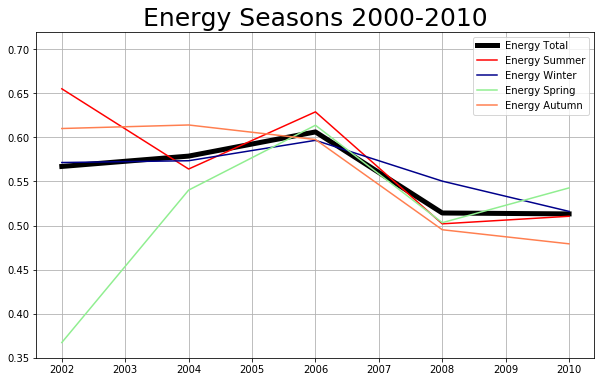

In [41]:
#summer
tracks_albums_summer_2000_year_mean = tracks_albums_summer_2000_year.groupby('categorical_year').mean()
tracks_albums_summer_2000_year_mean_energy = tracks_albums_summer_2000_year_mean[['energy']]

# winter
tracks_albums_winter_2000_year_mean = tracks_albums_winter_2000_year.groupby('categorical_year').mean()
tracks_albums_winter_2000_year_mean_energy = tracks_albums_winter_2000_year_mean[['energy']]

#spring
tracks_albums_spring_2000_year_mean = tracks_albums_spring_2000_year.groupby('categorical_year').mean()
tracks_albums_spring_2000_year_mean_energy = tracks_albums_spring_2000_year_mean[['energy']]

#autumn
tracks_albums_autumn_2000_year_mean = tracks_albums_autumn_2000_year.groupby('categorical_year').mean()
tracks_albums_autumn_2000_year_mean_energy = tracks_albums_autumn_2000_year_mean[['energy']]
#total
tracks_albums_total_2000_mean = tracks_albums_total_2000_year.groupby('categorical_year').mean()
tracks_albums_total_2000_mean_valence = tracks_albums_total_2000_mean[['energy']]

def energy_seasons_00_10_categorical():
    plt.grid()
    plt.ylim(0.35, 0.72)
    sns.lineplot(data=tracks_albums_total_2000_mean_valence["energy"], 
                 color="black", label="Energy Total", linewidth=5)
    sns.lineplot(data=tracks_albums_summer_2000_year_mean_energy["energy"],
                 color="red", label="Energy Summer")
    sns.lineplot(data=tracks_albums_winter_2000_year_mean_energy["energy"],
                 color="darkblue", label="Energy Winter")
    sns.lineplot(data=tracks_albums_spring_2000_year_mean_energy["energy"],
                 color="lightgreen", label="Energy Spring")
    return sns.lineplot(data=tracks_albums_autumn_2000_year_mean_energy["energy"], 
                        color="coral", label="Energy Autumn")

std_plot(energy_seasons_00_10_categorical, title='Energy Seasons 2000-2010')
export_line_viz([tracks_albums_total_2000_mean_valence, 
                 tracks_albums_summer_2000_year_mean_energy,
                 tracks_albums_winter_2000_year_mean_energy, 
                 tracks_albums_spring_2000_year_mean_energy,
                 tracks_albums_autumn_2000_year_mean_energy], 
                 'energy1')

In the previous plot we can observe that the energy of the tracks had a samll increase from the 2002 until 2006, then it had a significant decrease until 2008 and since then has remained stable.

<a id='4.7'></a>
### 4.7 Valence 2010-2018

In [42]:
#summer
tracks_albums_summer_2010 = tracks_albums.loc[lambda tracks_albums: (tracks_albums.album_date_released.dt.month >5)\
                 & (tracks_albums.album_date_released.dt.month <9) \
                 & (tracks_albums.album_date_released.dt.year >2009)]
tracks_albums_summer_2010 = tracks_albums_summer_2010.copy()
tracks_albums_summer_2010['categorical_year'] = pd.cut(tracks_albums_summer_2010['album_date_released'].dt.year, \
                                                       [2010, 2012, 2014, 2016, 2018], \
                                                       labels=[2012, 2014, 2016, 2018])
tracks_albums_summer_2010_year = tracks_albums_summer_2010.groupby('categorical_year').mean()

#winter
tracks_albums_winter_2010 = tracks_albums.loc[lambda tracks_albums: ((tracks_albums.album_date_released.dt.month <3)\
                 | (tracks_albums.album_date_released.dt.month >11)) \
                 & (tracks_albums.album_date_released.dt.year >2009)]
tracks_albums_winter_2010 = tracks_albums_winter_2010.copy()
tracks_albums_winter_2010['categorical_year'] = pd.cut(tracks_albums_winter_2010['album_date_released'].dt.year, \
                                                       [2010, 2012, 2014, 2016, 2018], \
                                                       labels=[2012, 2014, 2016, 2018])
tracks_albums_winter_2010_year = tracks_albums_winter_2010.groupby('categorical_year').mean()

#spring
tracks_albums_spring_2010 = tracks_albums.loc[lambda tracks_albums: (tracks_albums.album_date_released.dt.month >2)\
                 & (tracks_albums.album_date_released.dt.month <6) \
                 & (tracks_albums.album_date_released.dt.year >2009)]
tracks_albums_spring_2010 = tracks_albums_spring_2010.copy()
tracks_albums_spring_2010['categorical_year'] = pd.cut(tracks_albums_spring_2010['album_date_released'].dt.year, \
                                                       [2010, 2012, 2014, 2016, 2018], \
                                                       labels=[2012, 2014, 2016, 2018])
tracks_albums_spring_2010_year = tracks_albums_spring_2010.groupby('categorical_year').mean()

#autumn
tracks_albums_autumn_2010 = tracks_albums.loc[lambda tracks_albums: (tracks_albums.album_date_released.dt.month >8)\
                 & (tracks_albums.album_date_released.dt.month <12) \
                 & (tracks_albums.album_date_released.dt.year >2009)]
tracks_albums_autumn_2010 = tracks_albums_autumn_2010.copy()
tracks_albums_autumn_2010['categorical_year'] = pd.cut(tracks_albums_autumn_2010['album_date_released'].dt.year, \
                                                       [2010, 2012, 2014, 2016, 2018], \
                                                       labels=[2012, 2014, 2016, 2018])
tracks_albums_autumn_2010_year = tracks_albums_autumn_2010.groupby('categorical_year').mean()

#total
tracks_albums_total_2010 = tracks_albums.loc[lambda tracks_albums:(tracks_albums.album_date_released.dt.year >2009)\
                 & (tracks_albums.album_date_released.dt.year <2019)]
tracks_albums_total_2010 = tracks_albums_total_2010.copy()
tracks_albums_total_2010['categorical_year'] = pd.cut(tracks_albums_total_2010['album_date_released'].dt.year, \
                                                       [2010, 2012, 2014, 2016, 2018], \
                                                       labels=[2012, 2014, 2016, 2018])
tracks_albums_total_2010_year = tracks_albums_total_2010.groupby('categorical_year').mean()


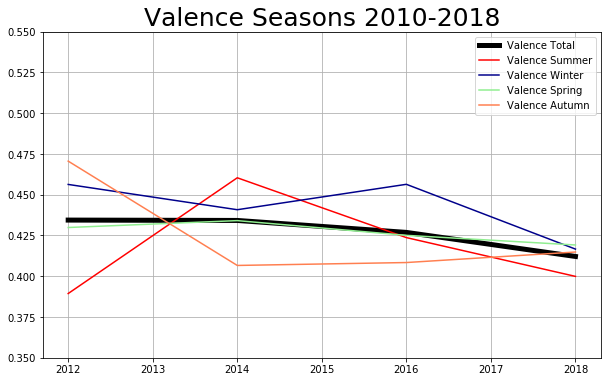

In [43]:
#summer
tracks_albums_summer_2010_year_mean = tracks_albums_summer_2010_year.groupby('categorical_year').mean()
tracks_albums_summer_2010_year_mean_valence = tracks_albums_summer_2010_year_mean[['valence']]

#winter
tracks_albums_winter_2010_year_mean = tracks_albums_winter_2010_year.groupby('categorical_year').mean()
tracks_albums_winter_2010_year_mean_valence = tracks_albums_winter_2010_year_mean[['valence']]

#spring
tracks_albums_spring_2010_year_mean = tracks_albums_spring_2010_year.groupby('categorical_year').mean()
tracks_albums_spring_2010_year_mean_valence = tracks_albums_spring_2010_year_mean[['valence']]

#autumn
tracks_albums_autumn_2010_year_mean = tracks_albums_autumn_2010_year.groupby('categorical_year').mean()
tracks_albums_autumn_2010_year_mean_valence = tracks_albums_autumn_2010_year_mean[['valence']]

#total
tracks_albums_total_2010_mean = tracks_albums_total_2010_year.groupby('categorical_year').mean()
tracks_albums_total_2010_mean_valence = tracks_albums_total_2010_mean[['valence']]

def valence_seasons_10_18_categorical():
    plt.grid()
    plt.ylim(0.35, 0.55)
    sns.lineplot(data=tracks_albums_total_2010_mean_valence["valence"], 
                 color="black", label="Valence Total", linewidth=5)
    sns.lineplot(data=tracks_albums_summer_2010_year_mean_valence["valence"],
                 color="red", label="Valence Summer")
    sns.lineplot(data=tracks_albums_winter_2010_year_mean_valence["valence"], 
                 color="darkblue", label="Valence Winter")
    sns.lineplot(data=tracks_albums_spring_2010_year_mean_valence["valence"], 
                 color="lightgreen", label="Valence Spring")
    return sns.lineplot(data=tracks_albums_autumn_2010_year_mean_valence["valence"], 
                        color="coral", label="Valence Autumn")

std_plot(valence_seasons_10_18_categorical, title='Valence Seasons 2010-2018')
export_line_viz([tracks_albums_total_2010_mean_valence, 
                 tracks_albums_summer_2010_year_mean_valence,
                 tracks_albums_winter_2010_year_mean_valence, 
                 tracks_albums_spring_2010_year_mean_valence,
                 tracks_albums_autumn_2010_year_mean_valence], 
                 'valence2')


In the previous plot we can observe that the valence of the tracks remain stable until lelar 2014, then had a small decrease until 2016 and then again a small decrease.

<a id='4.8'></a>
### 4.8 Danceability 2010-2018

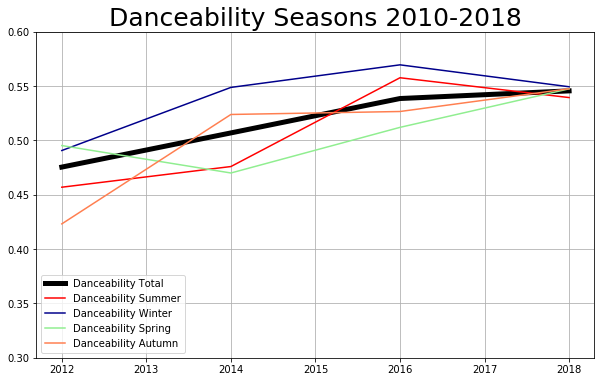

In [44]:
#summer
tracks_albums_summer_2010_year_mean = tracks_albums_summer_2010_year.groupby('categorical_year').mean()
tracks_albums_summer_2010_year_mean_danceability= tracks_albums_summer_2010_year_mean[['danceability']]

#winter
tracks_albums_winter_2010_year_mean = tracks_albums_winter_2010_year.groupby('categorical_year').mean()
tracks_albums_winter_2010_year_mean_danceability = tracks_albums_winter_2010_year_mean[['danceability']]

#spring
tracks_albums_spring_2010_year_mean = tracks_albums_spring_2010_year.groupby('categorical_year').mean()
tracks_albums_spring_2010_year_mean_danceability = tracks_albums_spring_2010_year_mean[['danceability']]

#autumn
tracks_albums_autumn_2010_year_mean = tracks_albums_autumn_2010_year.groupby('categorical_year').mean()
tracks_albums_autumn_2010_year_mean_danceability = tracks_albums_autumn_2010_year_mean[['danceability']]

#total
tracks_albums_total_2010_mean = tracks_albums_total_2010_year.groupby('categorical_year').mean()
tracks_albums_total_2010_mean_valence = tracks_albums_total_2010_mean[['danceability']]

def danceability_seasons_10_18_categorical():
    plt.grid()
    plt.ylim(0.3, 0.6)
    sns.lineplot(data=tracks_albums_total_2010_mean_valence["danceability"], 
                 color="black", label="Danceability Total", linewidth=5)
    sns.lineplot(data=tracks_albums_summer_2010_year_mean_danceability["danceability"],
                 color="red", label="Danceability Summer")
    sns.lineplot(data=tracks_albums_winter_2010_year_mean_danceability["danceability"],
                 color="darkblue", label="Danceability Winter")
    sns.lineplot(data=tracks_albums_spring_2010_year_mean_danceability["danceability"],
                 color="lightgreen", label="Danceability Spring")
    return sns.lineplot(data=tracks_albums_autumn_2010_year_mean_danceability["danceability"],
                        color="coral", label="Danceability Autumn")

std_plot(danceability_seasons_10_18_categorical, title='Danceability Seasons 2010-2018')
export_line_viz([tracks_albums_total_2010_mean_valence, 
                 tracks_albums_summer_2010_year_mean_danceability,
                 tracks_albums_winter_2010_year_mean_danceability, 
                 tracks_albums_spring_2010_year_mean_danceability,
                 tracks_albums_autumn_2010_year_mean_danceability], 
                 'danceability2')


The previous plot shows the increase of the evolution of the danceability of the tracks, as we can observe there is a clear increase of the danceability, the season where the danceability is higher is winter.

<a id='4.9'></a>
### 4.9 Energy 2010-2018

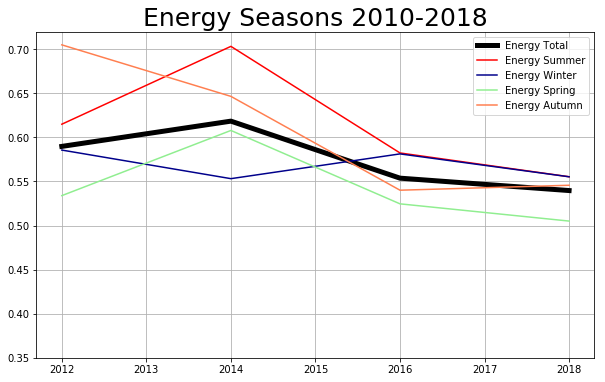

In [45]:
#summer
tracks_albums_summer_2010_year_mean = tracks_albums_summer_2010_year.groupby('categorical_year').mean()
tracks_albums_summer_2010_year_mean_energy = tracks_albums_summer_2010_year_mean[['energy']]

#winter
tracks_albums_winter_2010_year_mean = tracks_albums_winter_2010_year.groupby('categorical_year').mean()
tracks_albums_winter_2010_year_mean_energy = tracks_albums_winter_2010_year_mean[['energy']]

#spring
tracks_albums_spring_2010_year_mean = tracks_albums_spring_2010_year.groupby('categorical_year').mean()
tracks_albums_spring_2010_year_mean_energy = tracks_albums_spring_2010_year_mean[['energy']]

#autumn
tracks_albums_autumn_2010_year_mean = tracks_albums_autumn_2010_year.groupby('categorical_year').mean()
tracks_albums_autumn_2010_year_mean_energy = tracks_albums_autumn_2010_year_mean[['energy']]

#total
tracks_albums_total_2010_mean = tracks_albums_total_2010_year.groupby('categorical_year').mean()
tracks_albums_total_2010_mean_valence = tracks_albums_total_2010_mean[['energy']]

def energy_seasons_10_18_categorical():
    plt.grid()
    plt.ylim(0.35, 0.72)
    sns.lineplot(data=tracks_albums_total_2010_mean_valence["energy"], 
                 color="black", label="Energy Total", linewidth=5)
    sns.lineplot(data=tracks_albums_summer_2010_year_mean_energy["energy"], 
                 color="red", label="Energy Summer")
    sns.lineplot(data=tracks_albums_winter_2010_year_mean_energy["energy"],
                 color="darkblue", label="Energy Winter")
    sns.lineplot(data=tracks_albums_spring_2010_year_mean_energy["energy"],
                 color="lightgreen", label="Energy Spring")
    return sns.lineplot(data=tracks_albums_autumn_2010_year_mean_energy["energy"],
                        color="coral", label="Energy Autumn")

std_plot(energy_seasons_10_18_categorical, title='Energy Seasons 2010-2018')
export_line_viz([tracks_albums_total_2010_mean_valence, 
                 tracks_albums_summer_2010_year_mean_energy,
                 tracks_albums_winter_2010_year_mean_energy, 
                 tracks_albums_spring_2010_year_mean_energy,
                 tracks_albums_autumn_2010_year_mean_energy], 
                 'energy2')


In the previous plot we can observe that the energy of the tracks had a samll increase from the 2012 until 2014, then it had a small decrease until 2016 and since then had a small decrease.